In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from pathlib import Path
if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

In [2]:
ID_51_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_051_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_085_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_045_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_013_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_070_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_072_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_133_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_134_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_135_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_136_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_137_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_138_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_139_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_139_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_140_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_140_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
ID_86_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_086_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_48_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_048_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_17_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_017_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_71_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_071_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_73_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_073_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_141_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_141_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_142_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_142_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_143_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_143_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_144_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_144_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_145_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_145_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_146_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_146_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_147_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_147_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_148_2021 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2021/TagID_148_2021.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [5]:
ID_51_2021

,CreateDateTime,TagValue,TagId
0,2021-01-04 08:00:46.646,1.157349,51
1,2021-01-04 08:00:46.845,0.000000,51
2,2021-01-04 08:00:47.875,-0.578735,51
3,2021-01-04 08:00:48.073,-1.736084,51
4,2021-01-04 08:00:48.279,-6.365723,51
...,...,...,...
37145170,2021-10-07 08:35:53.571,-227.430600,51
37145171,2021-10-07 08:35:54.075,-207.175990,51
37145172,2021-10-07 08:35:56.069,-215.856510,51
37145173,2021-10-07 08:35:56.272,-217.013900,51


<AxesSubplot:xlabel='CreateDateTime'>

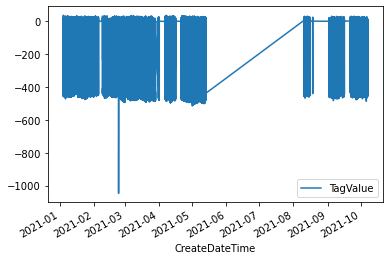

In [19]:
ID_51_2021.plot('CreateDateTime','TagValue')

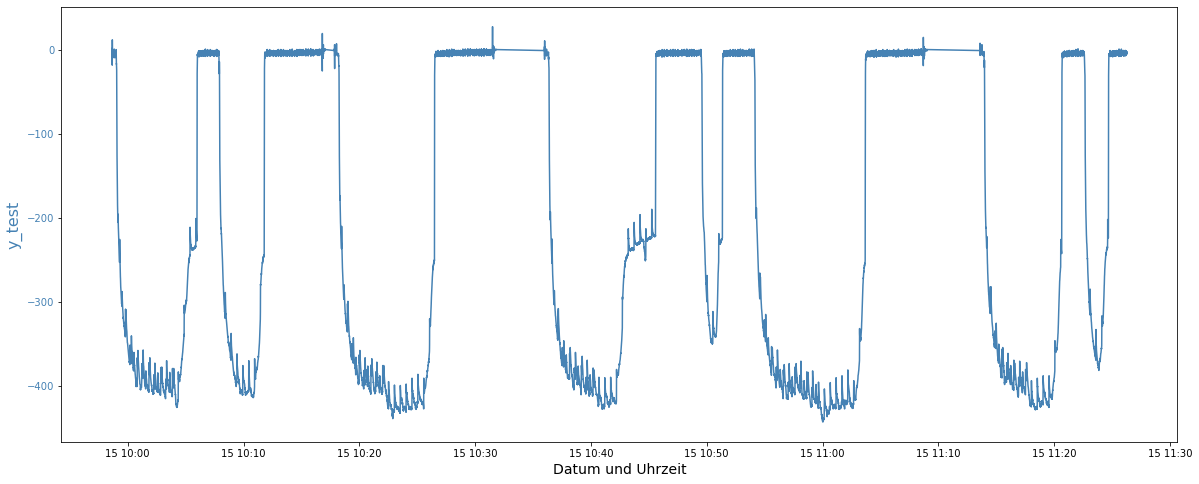

In [23]:
Daten_1 = ID_51_2021
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-09-15 09:55:00')&(Daten_1['CreateDateTime']<'2021-09-15 11:26:16')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
# plt.ylim((0.5, 6))

<AxesSubplot:xlabel='CreateDateTime'>

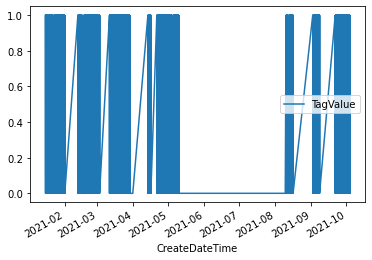

In [8]:
ID_86_2021.plot('CreateDateTime','TagValue')

In [36]:
ID_86_2021.loc[21050:21100]

,CreateDateTime,TagValue,TagId
21050,2021-08-16 06:08:49.723,0.0,86
21051,2021-08-16 06:14:41.029,1.0,86
21052,2021-08-16 06:16:05.778,0.0,86
21053,2021-08-16 06:25:11.043,1.0,86
21054,2021-08-16 06:28:29.731,0.0,86
21055,2021-08-16 06:34:35.160,1.0,86
21056,2021-08-16 06:36:11.878,0.0,86
21057,2021-08-16 06:44:01.113,1.0,86
21058,2021-08-16 06:46:29.751,0.0,86
21059,2021-08-16 06:56:07.115,1.0,86


In [8]:
###目标变量
TREE_3 = pd.DataFrame()
TREE_4 = pd.DataFrame()
TREE_3 = ID_51_2021[(ID_51_2021['CreateDateTime']>'2021-09-01 00:00:00')&(ID_51_2021['CreateDateTime']<'2021-10-15 00:00:00')]
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_3 = TREE_3.drop('TagId',axis = 1)


###特征合并函数
def zusammen(data,TREE_3):
    data = data[(data['CreateDateTime']>'2021-09-01 00:00:00')&(data['CreateDateTime']<'2021-10-15 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3

def zusammen_ohneTagId(data,TREE_3):
    data = data[(data['CreateDateTime']>'2021-09-01 00:00:00')&(data['CreateDateTime']<'2021-10-15 00:00:00')]
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3


###滤网特征处理
frames = [ID_133_2021.drop('TagId',axis = 1), ID_134_2021.drop('TagId',axis = 1), ID_135_2021.drop('TagId',axis = 1), ID_136_2021.drop('TagId',axis = 1), ID_137_2021.drop('TagId',axis = 1), ID_138_2021.drop('TagId',axis = 1)]
ID_133_bis_138_2021 = pd.concat(frames)
ID_133_bis_138_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2021 = ID_133_bis_138_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2021 = ID_133_bis_138_2021.reset_index()
ID_133_bis_138_2021 = ID_133_bis_138_2021.drop('index',axis = 1)

frames = [ID_141_2021.drop('TagId',axis = 1), ID_142_2021.drop('TagId',axis = 1), ID_143_2021.drop('TagId',axis = 1), ID_144_2021.drop('TagId',axis = 1), ID_145_2021.drop('TagId',axis = 1), ID_146_2021.drop('TagId',axis = 1)]
ID_141_bis_146_2021 = pd.concat(frames)
ID_141_bis_146_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2021 = ID_141_bis_146_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2021 = ID_141_bis_146_2021.reset_index()
ID_141_bis_146_2021 = ID_141_bis_146_2021.drop('index',axis = 1)


###Turbokonus 特征处理
frames = [ID_139_2021.drop('TagId',axis = 1), ID_140_2021.drop('TagId',axis = 1)]
ID_139_bis_140_2021 = pd.concat(frames)
ID_139_bis_140_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2021 = ID_139_bis_140_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2021 = ID_139_bis_140_2021.reset_index()
ID_139_bis_140_2021 = ID_139_bis_140_2021.drop('index',axis = 1)

frames = [ID_147_2021.drop('TagId',axis = 1), ID_148_2021.drop('TagId',axis = 1)]
ID_147_bis_148_2021 = pd.concat(frames)
ID_147_bis_148_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2021 = ID_147_bis_148_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2021 = ID_147_bis_148_2021.reset_index()
ID_147_bis_148_2021 = ID_147_bis_148_2021.drop('index',axis = 1)


###合并特征
TREE_3 = zusammen(ID_85_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_45_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_3 = zusammen(ID_13_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_70_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_72_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_133_bis_138_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_139_bis_140_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_3 = zusammen(ID_86_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_48_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_17_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_71_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_73_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_141_bis_146_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_147_bis_148_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_3['85_Eckventil_ABS-8.1'] = TREE_3['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_3['13_Vollmelder_ABS-8.1'] = TREE_3['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_3['70_Hertz-Schleuse_ABS-8.1'] = TREE_3['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_3['72_Hertz-Schleuse_BB-8.1'] = TREE_3['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_3['133-138_Filterabreinigung_ABS-8.1'] = TREE_3['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_3['CreateDateTime_Differenz'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()

TREE_3['86_Eckventil_ABS-8.2'] = TREE_3['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(0,limit=1)
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_3['17_Vollmelder_ABS-8.2'] = TREE_3['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_3['71_Hertz-Schleuse_ABS-8.2'] = TREE_3['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_3['73_Hertz-Schleuse_BB-8.2'] = TREE_3['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_3['141-146_Filterabreinigung_ABS-8.2'] = TREE_3['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


###对过长停机时间做判断
TREE_3.loc[TREE_3['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_4 = NaNjgtc(TREE_3)


###构建新的延时特征
#长延时特征
#传感器85正反向计时，传感器45正向计时
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2021['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2021['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2021['CreateDateTime']
gh['TagValue'] = ID_85_2021['TagValue']
gh['TagId'] = ID_85_2021['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2021['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2021['CreateDateTime']
er['TagValue'] = ID_45_2021['TagValue']
er['TagId'] = ID_45_2021['TagId']

TREE_4 = zusammen(gh,TREE_4)
TREE_4['CreateDateTime_85_0'] = TREE_4['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_85_1'] = TREE_4['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_4['deltatime_85_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_85_0'] 
TREE_4['deltatime_85_0'] = TREE_4['deltatime_85_0'].dt.total_seconds()
TREE_4['deltatime_85_1'] = TREE_4['CreateDateTime_85_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_85_1'] = TREE_4['deltatime_85_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_1',axis = 1)
TREE_4 = zusammen(er,TREE_4)
TREE_4['CreateDateTime_45_0'] = TREE_4['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_4['deltatime_45_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_45_0'] 
TREE_4['deltatime_45_0'] = TREE_4['deltatime_45_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_45_0',axis = 1)

#传感器86正反向计时，传感器48正向计时
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2021['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2021['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2021['CreateDateTime']
gh1['TagValue'] = ID_86_2021['TagValue']
gh1['TagId'] = ID_86_2021['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2021['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2021['CreateDateTime']
er1['TagValue'] = ID_48_2021['TagValue']
er1['TagId'] = ID_48_2021['TagId']


TREE_4 = zusammen(gh1,TREE_4)
# gh1 = gh1[(gh1['CreateDateTime']>'2021-08-16 09:13:00')&(gh1['CreateDateTime']<'2021-10-15 00:00:00')]
# gh1 = gh1.drop('TagId',axis = 1) 
# TREE_4 = TREE_4.set_index('CreateDateTime').join(gh1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
# TREE_4 = TREE_4.reset_index('CreateDateTime')
TREE_4['CreateDateTime_86_0'] = TREE_4['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_86_1'] = TREE_4['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_4['deltatime_86_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_86_0'] 
TREE_4['deltatime_86_0'] = TREE_4['deltatime_86_0'].dt.total_seconds()
TREE_4['deltatime_86_1'] = TREE_4['CreateDateTime_86_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_86_1'] = TREE_4['deltatime_86_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_1',axis = 1)
TREE_4 = zusammen(er1,TREE_4)
TREE_4['CreateDateTime_48_0'] = TREE_4['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_4['deltatime_48_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_48_0'] 
TREE_4['deltatime_48_0'] = TREE_4['deltatime_48_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_48_0',axis = 1)


#传感器133-138正向计时，传感器141-146正向计时
op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2021['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2021['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2021['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2021['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2021['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2021['TagValue']

TREE_4 = zusammen_ohneTagId(op,TREE_4)
TREE_4['CreateDateTime_133_bis_138_0'] = TREE_4['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_4['deltatime_133_bis_138_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_133_bis_138_0'] 
TREE_4['deltatime_133_bis_138_0'] = TREE_4['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_4 = zusammen_ohneTagId(op1,TREE_4)
TREE_4['CreateDateTime_141_bis_146_0'] = TREE_4['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_4['deltatime_141_bis_146_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_141_bis_146_0'] 
TREE_4['deltatime_141_bis_146_0'] = TREE_4['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_141_bis_146_0',axis = 1)

#传感器139-140正向计时，传感器147-148正向计时
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2021['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2021['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2021['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2021['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2021['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2021['TagValue']

TREE_4 = zusammen_ohneTagId(nm,TREE_4)
TREE_4['CreateDateTime_139_bis_140_0'] = TREE_4['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_4['deltatime_139_bis_140_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_139_bis_140_0'] 
TREE_4['deltatime_139_bis_140_0'] = TREE_4['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_4 = zusammen_ohneTagId(nm1,TREE_4)
TREE_4['CreateDateTime_147_bis_148_0'] = TREE_4['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_4['deltatime_147_bis_148_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_147_bis_148_0'] 
TREE_4['deltatime_147_bis_148_0'] = TREE_4['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_147_bis_148_0',axis = 1)

#时间戳
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [9]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2021-09-02 04:19:44.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11460.891,NaN,NaN,7896.908,NaN,NaN,0.000,NaN,NaN,1630556384493
1,2021-09-02 04:19:44.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11460.488,NaN,NaN,7896.505,NaN,NaN,0.000,NaN,NaN,1630556384896
2,2021-09-02 04:19:55.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11450.246,NaN,NaN,7886.263,NaN,NaN,0.000,NaN,NaN,1630556395138
3,2021-09-02 04:19:55.746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11449.638,NaN,NaN,7885.655,NaN,NaN,0.000,NaN,NaN,1630556395746
4,2021-09-02 04:20:05.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11439.409,NaN,NaN,7875.426,NaN,NaN,0.000,NaN,NaN,1630556405975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867606,2021-10-07 08:35:54.042,-208.502185,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,503.464,280428.393,NaN,303502.779,0.000,253246.653,378.514,280675.174,1633595754042
8867607,2021-10-07 08:35:54.075,-207.175990,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,503.497,280428.426,NaN,303502.812,0.033,253246.686,378.547,280675.207,1633595754075
8867608,2021-10-07 08:35:56.069,-215.856510,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,505.491,280430.420,NaN,303504.806,2.027,253248.680,380.541,280677.201,1633595756069
8867609,2021-10-07 08:35:56.272,-217.013900,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,505.694,280430.623,NaN,303505.009,2.230,253248.883,380.744,280677.404,1633595756272


In [10]:
TREE_4.isnull().sum()

CreateDateTime                                0
51_Foerderdruck                            1484
85_Eckventil_ABS-8.1                       8033
45_Laufmeldung-Vibrationssieb_BB-8.1       8695
13_Vollmelder_ABS-8.1                      8034
70_Hertz-Schleuse_ABS-8.1                  7984
72_Hertz-Schleuse_BB-8.1                   8153
133-138_Filterabreinigung_ABS-8.1          7983
139-140_Turbokonus Eckventile_ABS-8.1      7982
86_Eckventil_ABS-8.2                       1483
48_Laufmeldung-Vibrationssieb_ABS-8.2         0
17_Vollmelder_ABS-8.2                      2201
71_Hertz-Schleuse_ABS-8.2                  1460
73_Hertz-Schleuse_BB-8.2                   1616
141-146_Filterabreinigung_ABS-8.2             0
147-148_Turbokonus-Eckventile_ABS-8.2      1461
CreateDateTime_Differenz                      1
deltatime_85_0                             8033
deltatime_85_1                              658
deltatime_45_0                             8695
deltatime_86_0                          

In [11]:
TREE_4 = TREE_4.dropna()
TREE_4 = TREE_4.reset_index(drop=True)
TREE_4.isnull().sum()

CreateDateTime                           0
51_Foerderdruck                          0
85_Eckventil_ABS-8.1                     0
45_Laufmeldung-Vibrationssieb_BB-8.1     0
13_Vollmelder_ABS-8.1                    0
70_Hertz-Schleuse_ABS-8.1                0
72_Hertz-Schleuse_BB-8.1                 0
133-138_Filterabreinigung_ABS-8.1        0
139-140_Turbokonus Eckventile_ABS-8.1    0
86_Eckventil_ABS-8.2                     0
48_Laufmeldung-Vibrationssieb_ABS-8.2    0
17_Vollmelder_ABS-8.2                    0
71_Hertz-Schleuse_ABS-8.2                0
73_Hertz-Schleuse_BB-8.2                 0
141-146_Filterabreinigung_ABS-8.2        0
147-148_Turbokonus-Eckventile_ABS-8.2    0
CreateDateTime_Differenz                 0
deltatime_85_0                           0
deltatime_85_1                           0
deltatime_45_0                           0
deltatime_86_0                           0
deltatime_86_1                           0
deltatime_48_0                           0
deltatime_1

In [12]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2021-09-02 08:40:41.358,-449.076904,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,34.745,311.911,144.008,34.745,0.000,22.806,7.000,6.574,184.581,1630572041358
1,2021-09-02 08:40:41.557,-449.652710,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,34.546,312.110,144.207,34.546,0.199,23.005,7.199,6.773,184.780,1630572041557
2,2021-09-02 08:40:41.954,-450.231410,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,34.149,312.507,144.604,34.149,0.596,23.402,7.596,7.170,185.177,1630572041954
3,2021-09-02 08:40:42.150,-449.652710,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,33.953,312.703,144.800,33.953,0.792,23.598,7.792,7.366,185.373,1630572042150
4,2021-09-02 08:40:42.368,-451.388890,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,33.735,312.921,145.018,33.735,1.010,23.816,8.010,7.584,185.591,1630572042368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503440,2021-10-04 02:42:04.637,-334.490810,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,1.012,473.397,217.519,1.012,23073.374,17.579,1.029,27.820,245.769,1633315324637
8503441,2021-10-04 02:42:04.839,-337.384310,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.810,473.599,217.721,0.810,23073.576,17.781,1.231,28.022,245.971,1633315324839
8503442,2021-10-04 02:42:05.044,-336.805600,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.605,473.804,217.926,0.605,23073.781,17.986,1.436,28.227,246.176,1633315325044
8503443,2021-10-04 02:42:05.455,-339.699100,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.194,474.215,218.337,0.194,23074.192,18.397,1.847,28.638,246.587,1633315325455


In [54]:
TREE_4.to_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-test-2021.csv')

In [4]:
###目标变量
TREE_3 = pd.DataFrame()
TREE_4 = pd.DataFrame()
TREE_3 = ID_51_2021[(ID_51_2021['CreateDateTime']>'2021-01-01 00:00:00')&(ID_51_2021['CreateDateTime']<'2021-03-01 00:00:00')]
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_3 = TREE_3.drop('TagId',axis = 1)


###特征合并函数
def zusammen(data,TREE_3):
    data = data[(data['CreateDateTime']>'2021-01-01 00:00:00')&(data['CreateDateTime']<'2021-03-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3

def zusammen_ohneTagId(data,TREE_3):
    data = data[(data['CreateDateTime']>'2021-01-01 00:00:00')&(data['CreateDateTime']<'2021-03-01 00:00:00')]
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3


###滤网特征处理
frames = [ID_133_2021.drop('TagId',axis = 1), ID_134_2021.drop('TagId',axis = 1), ID_135_2021.drop('TagId',axis = 1), ID_136_2021.drop('TagId',axis = 1), ID_137_2021.drop('TagId',axis = 1), ID_138_2021.drop('TagId',axis = 1)]
ID_133_bis_138_2021 = pd.concat(frames)
ID_133_bis_138_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2021 = ID_133_bis_138_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2021 = ID_133_bis_138_2021.reset_index()
ID_133_bis_138_2021 = ID_133_bis_138_2021.drop('index',axis = 1)

frames = [ID_141_2021.drop('TagId',axis = 1), ID_142_2021.drop('TagId',axis = 1), ID_143_2021.drop('TagId',axis = 1), ID_144_2021.drop('TagId',axis = 1), ID_145_2021.drop('TagId',axis = 1), ID_146_2021.drop('TagId',axis = 1)]
ID_141_bis_146_2021 = pd.concat(frames)
ID_141_bis_146_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2021 = ID_141_bis_146_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2021 = ID_141_bis_146_2021.reset_index()
ID_141_bis_146_2021 = ID_141_bis_146_2021.drop('index',axis = 1)


###Turbokonus 特征处理
frames = [ID_139_2021.drop('TagId',axis = 1), ID_140_2021.drop('TagId',axis = 1)]
ID_139_bis_140_2021 = pd.concat(frames)
ID_139_bis_140_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2021 = ID_139_bis_140_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2021 = ID_139_bis_140_2021.reset_index()
ID_139_bis_140_2021 = ID_139_bis_140_2021.drop('index',axis = 1)

frames = [ID_147_2021.drop('TagId',axis = 1), ID_148_2021.drop('TagId',axis = 1)]
ID_147_bis_148_2021 = pd.concat(frames)
ID_147_bis_148_2021.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2021 = ID_147_bis_148_2021.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2021 = ID_147_bis_148_2021.reset_index()
ID_147_bis_148_2021 = ID_147_bis_148_2021.drop('index',axis = 1)


###合并特征
TREE_3 = zusammen(ID_85_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_45_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_3 = zusammen(ID_13_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_70_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_72_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_133_bis_138_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_139_bis_140_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_3 = zusammen(ID_86_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_48_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_17_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_71_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_73_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_141_bis_146_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_147_bis_148_2021,TREE_3)
TREE_3.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_3['85_Eckventil_ABS-8.1'] = TREE_3['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_3['13_Vollmelder_ABS-8.1'] = TREE_3['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_3['70_Hertz-Schleuse_ABS-8.1'] = TREE_3['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_3['72_Hertz-Schleuse_BB-8.1'] = TREE_3['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_3['133-138_Filterabreinigung_ABS-8.1'] = TREE_3['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_3['CreateDateTime_Differenz'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()

TREE_3['86_Eckventil_ABS-8.2'] = TREE_3['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(0,limit=1)
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_3['17_Vollmelder_ABS-8.2'] = TREE_3['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_3['71_Hertz-Schleuse_ABS-8.2'] = TREE_3['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_3['73_Hertz-Schleuse_BB-8.2'] = TREE_3['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_3['141-146_Filterabreinigung_ABS-8.2'] = TREE_3['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


###对过长停机时间做判断
TREE_3.loc[TREE_3['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_4 = NaNjgtc(TREE_3)


###构建新的延时特征
#长延时特征
#传感器85正反向计时，传感器45正向计时
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2021['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2021['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2021['CreateDateTime']
gh['TagValue'] = ID_85_2021['TagValue']
gh['TagId'] = ID_85_2021['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2021['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2021['CreateDateTime']
er['TagValue'] = ID_45_2021['TagValue']
er['TagId'] = ID_45_2021['TagId']

TREE_4 = zusammen(gh,TREE_4)
TREE_4['CreateDateTime_85_0'] = TREE_4['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_85_1'] = TREE_4['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_4['deltatime_85_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_85_0'] 
TREE_4['deltatime_85_0'] = TREE_4['deltatime_85_0'].dt.total_seconds()
TREE_4['deltatime_85_1'] = TREE_4['CreateDateTime_85_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_85_1'] = TREE_4['deltatime_85_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_1',axis = 1)
TREE_4 = zusammen(er,TREE_4)
TREE_4['CreateDateTime_45_0'] = TREE_4['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_4['deltatime_45_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_45_0'] 
TREE_4['deltatime_45_0'] = TREE_4['deltatime_45_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_45_0',axis = 1)

#传感器86正反向计时，传感器48正向计时
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2021['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2021['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2021['CreateDateTime']
gh1['TagValue'] = ID_86_2021['TagValue']
gh1['TagId'] = ID_86_2021['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2021['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2021['CreateDateTime']
er1['TagValue'] = ID_48_2021['TagValue']
er1['TagId'] = ID_48_2021['TagId']


TREE_4 = zusammen(gh1,TREE_4)
# gh1 = gh1[(gh1['CreateDateTime']>'2021-08-16 09:13:00')&(gh1['CreateDateTime']<'2021-10-15 00:00:00')]
# gh1 = gh1.drop('TagId',axis = 1) 
# TREE_4 = TREE_4.set_index('CreateDateTime').join(gh1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
# TREE_4 = TREE_4.reset_index('CreateDateTime')
TREE_4['CreateDateTime_86_0'] = TREE_4['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_86_1'] = TREE_4['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_4['deltatime_86_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_86_0'] 
TREE_4['deltatime_86_0'] = TREE_4['deltatime_86_0'].dt.total_seconds()
TREE_4['deltatime_86_1'] = TREE_4['CreateDateTime_86_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_86_1'] = TREE_4['deltatime_86_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_1',axis = 1)
TREE_4 = zusammen(er1,TREE_4)
TREE_4['CreateDateTime_48_0'] = TREE_4['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_4['deltatime_48_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_48_0'] 
TREE_4['deltatime_48_0'] = TREE_4['deltatime_48_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_48_0',axis = 1)


#传感器133-138正向计时，传感器141-146正向计时
op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2021['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2021['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2021['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2021['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2021['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2021['TagValue']

TREE_4 = zusammen_ohneTagId(op,TREE_4)
TREE_4['CreateDateTime_133_bis_138_0'] = TREE_4['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_4['deltatime_133_bis_138_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_133_bis_138_0'] 
TREE_4['deltatime_133_bis_138_0'] = TREE_4['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_4 = zusammen_ohneTagId(op1,TREE_4)
TREE_4['CreateDateTime_141_bis_146_0'] = TREE_4['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_4['deltatime_141_bis_146_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_141_bis_146_0'] 
TREE_4['deltatime_141_bis_146_0'] = TREE_4['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_141_bis_146_0',axis = 1)

#传感器139-140正向计时，传感器147-148正向计时
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2021['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2021['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2021['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2021['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2021['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2021['TagValue']

TREE_4 = zusammen_ohneTagId(nm,TREE_4)
TREE_4['CreateDateTime_139_bis_140_0'] = TREE_4['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_4['deltatime_139_bis_140_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_139_bis_140_0'] 
TREE_4['deltatime_139_bis_140_0'] = TREE_4['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_4 = zusammen_ohneTagId(nm1,TREE_4)
TREE_4['CreateDateTime_147_bis_148_0'] = TREE_4['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_4['deltatime_147_bis_148_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_147_bis_148_0'] 
TREE_4['deltatime_147_bis_148_0'] = TREE_4['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_147_bis_148_0',axis = 1)

#时间戳
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [5]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2021-01-04 08:00:46.018,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0.000,NaN,NaN,967987.652,NaN,0.000,NaN,NaN,NaN,1609747246018
1,2021-01-04 08:00:46.228,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1096.313,NaN,NaN,967987.442,NaN,0.000,NaN,NaN,NaN,1609747246228
2,2021-01-04 08:00:46.646,1.157349,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1095.895,NaN,NaN,967987.024,NaN,0.418,NaN,NaN,NaN,1609747246646
3,2021-01-04 08:00:46.845,0.000000,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1095.696,NaN,NaN,967986.825,NaN,0.617,NaN,NaN,NaN,1609747246845
4,2021-01-04 08:00:47.875,-0.578735,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1094.666,NaN,NaN,967985.795,NaN,1.647,NaN,NaN,NaN,1609747247875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13844949,2021-02-28 23:59:58.781,-458.333310,1.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,2592.807,603.366,NaN,23432.443,3.290,8.211,602.353,86.879,1614556798781
13844950,2021-02-28 23:59:58.985,-460.069400,1.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,2593.011,603.570,NaN,23432.647,3.494,8.415,602.557,87.083,1614556798985
13844951,2021-02-28 23:59:59.193,-460.648100,1.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,2593.219,603.778,NaN,23432.855,3.702,8.623,602.765,87.291,1614556799193
13844952,2021-02-28 23:59:59.402,-460.069400,1.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,NaN,2593.428,603.987,NaN,23433.064,3.911,8.832,602.974,87.500,1614556799402


In [6]:
TREE_4.isnull().sum()

CreateDateTime                                 0
51_Foerderdruck                                2
85_Eckventil_ABS-8.1                           0
45_Laufmeldung-Vibrationssieb_BB-8.1        3259
13_Vollmelder_ABS-8.1                      11981
70_Hertz-Schleuse_ABS-8.1                     10
72_Hertz-Schleuse_BB-8.1                     140
133-138_Filterabreinigung_ABS-8.1              0
139-140_Turbokonus Eckventile_ABS-8.1         11
86_Eckventil_ABS-8.2                     2560068
48_Laufmeldung-Vibrationssieb_ABS-8.2          0
17_Vollmelder_ABS-8.2                      13635
71_Hertz-Schleuse_ABS-8.2                2560021
73_Hertz-Schleuse_BB-8.2                 2560185
141-146_Filterabreinigung_ABS-8.2        2560065
147-148_Turbokonus-Eckventile_ABS-8.2    2560022
CreateDateTime_Differenz                       1
deltatime_85_0                                 0
deltatime_85_1                              1213
deltatime_45_0                              3259
deltatime_86_0      

In [7]:
TREE_4 = TREE_4.dropna()
TREE_4 = TREE_4.reset_index(drop=True)
TREE_4.isnull().sum()

CreateDateTime                           0
51_Foerderdruck                          0
85_Eckventil_ABS-8.1                     0
45_Laufmeldung-Vibrationssieb_BB-8.1     0
13_Vollmelder_ABS-8.1                    0
70_Hertz-Schleuse_ABS-8.1                0
72_Hertz-Schleuse_BB-8.1                 0
133-138_Filterabreinigung_ABS-8.1        0
139-140_Turbokonus Eckventile_ABS-8.1    0
86_Eckventil_ABS-8.2                     0
48_Laufmeldung-Vibrationssieb_ABS-8.2    0
17_Vollmelder_ABS-8.2                    0
71_Hertz-Schleuse_ABS-8.2                0
73_Hertz-Schleuse_BB-8.2                 0
141-146_Filterabreinigung_ABS-8.2        0
147-148_Turbokonus-Eckventile_ABS-8.2    0
CreateDateTime_Differenz                 0
deltatime_85_0                           0
deltatime_85_1                           0
deltatime_45_0                           0
deltatime_86_0                           0
deltatime_86_1                           0
deltatime_48_0                           0
deltatime_1

In [8]:
TREE_4

,CreateDateTime,51_Foerderdruck,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,...,deltatime_85_1,deltatime_45_0,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,timestamp
0,2021-01-15 16:25:03.341,-403.356410,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,802.066,1560.983,108.065,64.897,0.000,16.615,0.627,345.868,160.896,1610727903341
1,2021-01-15 16:25:03.546,-405.092590,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.861,1561.188,108.270,64.692,0.205,16.820,0.832,346.073,161.101,1610727903546
2,2021-01-15 16:25:03.746,-408.564790,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.661,1561.388,108.470,64.492,0.405,17.020,1.032,346.273,161.301,1610727903746
3,2021-01-15 16:25:03.965,-410.300900,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.442,1561.607,108.689,64.273,0.624,17.239,1.251,346.492,161.520,1610727903965
4,2021-01-15 16:25:04.376,-412.036990,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,...,801.031,1562.018,109.100,63.862,1.035,17.650,1.662,346.903,161.931,1610727904376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229912,2021-02-28 23:49:54.590,-353.009190,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,266.107,1988.616,68.931,0.825,22828.252,22.908,8.795,18.821,83.456,1614556194590
11229913,2021-02-28 23:49:54.795,-353.587890,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.902,1988.821,69.136,0.620,22828.457,23.113,9.000,19.026,83.661,1614556194795
11229914,2021-02-28 23:49:55.003,-354.166600,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.694,1989.029,69.344,0.412,22828.665,23.321,9.208,19.234,83.869,1614556195003
11229915,2021-02-28 23:49:55.214,-355.902710,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,...,265.483,1989.240,69.555,0.201,22828.876,23.532,9.419,19.445,84.080,1614556195214


In [9]:
TREE_4.to_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-test-2021-2.csv')